In [ ]:
import numpy as np                    # Biblioteca para manipulação númerica
import matplotlib.pyplot as plt       # Biblioteca para visualização e gráficos
import math                           # Biblioteca com funções matemáticas
import scipy as st
from scipy.odr import *
from scipy import interpolate
from scipy import optimize
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
'''
Coleta dos dados de fotometria.
'''

sh = gc.open_by_key("1QBtC6lj2znZGLdfrWMHtt-xsoTfK4YktFVd6ZAlJszY")

sheetList_data = sh.worksheets()
data = []

for sheet in sheetList_data:
  voltage = sheet.col_values(1)
  current = sheet.col_values(2)
  voltage.pop(0)
  current.pop(0)
  for x in enumerate(voltage):
    voltage[x[0]] = float(x[1])
  for y in enumerate(current):
    current[y[0]] = float(y[1])
  voltage = np.array(voltage)
  current = np.array(current)
  data.append([np.array(voltage),np.array(current),sheet.title])

In [ ]:
'''
Coleta dos dados de espectrografia dos LEDs.
'''

sh = gc.open_by_key("1MMgUiO8zbscakoI8fPdt-UyogKP8fdYuTFlZcuaFwFI")

sheetList_espectro = sh.worksheets()
espectro = []

for sheet in sheetList_espectro:
  frequency = sheet.col_values(1)
  intensity = sheet.col_values(2)
  frequency.pop(0)
  frequency.pop(0)
  intensity.pop(0)
  intensity.pop(0)
  for x in enumerate(frequency):
    frequency[x[0]] = float(x[1])
  for y in enumerate(intensity):
    intensity[y[0]] = float(y[1])
  frequency = np.array(frequency)
  intensity = np.array(intensity)
  espectro.append([np.array(frequency),np.array(intensity),sheet.title])

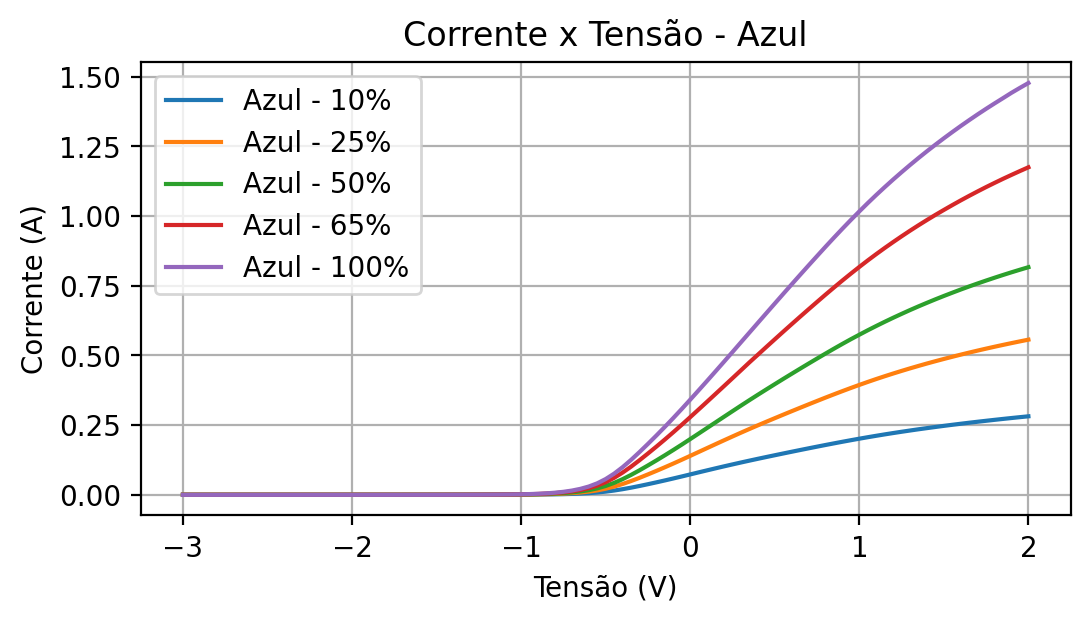

In [ ]:
'''
Mude a variavel lbl para a cor desejada para plotar o grafico respectivo.
'''
lbl = 'Azul'

plt.rcParams['font.size'] = 10
plt.figure(figsize=(6, 3), dpi=200)
plt.title('Corrente x Tensão - '+lbl)
plt.xlabel('Tensão (V)')
plt.ylabel('Corrente (A)')
for i in enumerate(data):
  if lbl in i[1][2]:
    plt.plot(i[1][0], i[1][1],"-",label=i[1][2])
plt.grid(True,'both')
plt.legend()
plt.show()



---
Abaixo determino o valor de V0 utilizando a segunda derivada das intensidades (corrente). O valor de V0 acontece quando a no início do primeiro pico. A curva de fundo era muito baixo para afetar as medidas substancialmente.

Violeta
-1.70(5) V

Azul
-1.15(5) V

Amarelo
-0.75(5) V

Vermelho
-0.65(5) V

Verde
-1.10(5) V


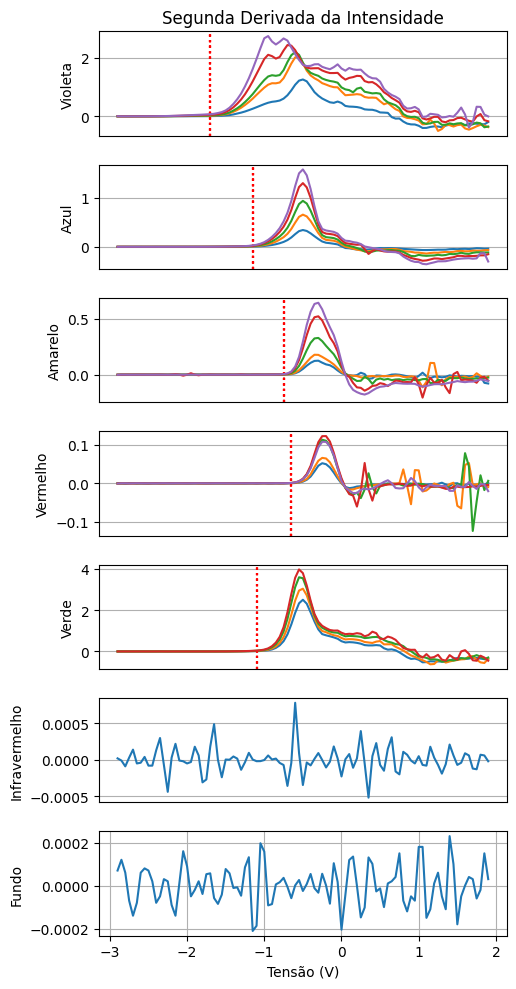

In [ ]:
def f2(x,y):
  der = []
  for i in range(2,len(x)-2,1):
    der.append((y[i+2]+y[i-2]-2*y[i])/((x[i+1]-x[i-1])**2))
  return der

lbl = ['Violeta','Azul','Amarelo','Vermelho','Verde','Infravermelho','Fundo']
maxs = [[],[],[],[],[]]
plt.rcParams['font.size'] = 10
fig = plt.figure(figsize=(5, 10), dpi=100)
spec = fig.add_gridspec(7, 1)

axFundo = fig.add_subplot(spec[6])
axInfra = fig.add_subplot(spec[5], sharex=axFundo)
axVerde = fig.add_subplot(spec[4], sharex=axFundo)
axVermelho = fig.add_subplot(spec[3], sharex=axFundo)
axAmarelo = fig.add_subplot(spec[2], sharex=axFundo)
axAzul = fig.add_subplot(spec[1], sharex=axFundo)
axVioleta = fig.add_subplot(spec[0], sharex=axFundo)

axVioleta.set_title('Segunda Derivada da Intensidade')

axInfra.get_xaxis().set_visible(False)
axVerde.get_xaxis().set_visible(False)
axVermelho.get_xaxis().set_visible(False)
axAmarelo.get_xaxis().set_visible(False)
axAzul.get_xaxis().set_visible(False)
axVioleta.get_xaxis().set_visible(False)

axVioleta.grid(True,'both')
axAzul.grid(True,'both')
axAmarelo.grid(True,'both')
axVermelho.grid(True,'both')
axVerde.grid(True,'both')
axInfra.grid(True,'both')
axFundo.grid(True,'both')
axFundo.set_xlabel('Tensão (V)')
axVioleta.set_ylabel('Violeta')
axAzul.set_ylabel('Azul')
axAmarelo.set_ylabel('Amarelo')
axVermelho.set_ylabel('Vermelho')
axVerde.set_ylabel('Verde')
axInfra.set_ylabel('Infravermelho')
axFundo.set_ylabel('Fundo')

fig.tight_layout()

for i in enumerate(data):
  if lbl[0] in i[1][2]:
    derivate = f2(i[1][0],i[1][1])
    indice = 26
    axVioleta.axvline(x=i[1][0][indice], color='r', linestyle=':')
    maxs[0].append(i[1][0][indice])
    axVioleta.plot(i[1][0][2:-2], derivate,"-")
  elif lbl[1] in i[1][2]:
    derivate = f2(i[1][0],i[1][1])
    indice = 37
    axAzul.axvline(x=i[1][0][indice], color='r', linestyle=':')
    maxs[1].append(i[1][0][indice])
    axAzul.plot(i[1][0][2:-2], derivate,"-")
  elif lbl[2] in i[1][2]:
    derivate = f2(i[1][0],i[1][1])
    indice = 45
    axAmarelo.axvline(x=i[1][0][indice], color='r', linestyle=':')
    maxs[2].append(i[1][0][indice])
    axAmarelo.plot(i[1][0][2:-2], derivate,"-")
  elif lbl[3] in i[1][2]:
    derivate = f2(i[1][0],i[1][1])
    indice = 47
    axVermelho.axvline(x=i[1][0][indice], color='r', linestyle=':')
    maxs[3].append(i[1][0][indice])
    axVermelho.plot(i[1][0][2:-2], derivate,"-")
  elif lbl[4] in i[1][2]:
    derivate = f2(i[1][0],i[1][1])
    indice = 38
    axVerde.axvline(x=i[1][0][indice], color='r', linestyle=':')
    maxs[4].append(i[1][0][indice])
    axVerde.plot(i[1][0][2:-2], derivate,"-")
  elif lbl[5] in i[1][2]:
    derivate = f2(i[1][0],i[1][1])
    axInfra.plot(i[1][0][2:-2], derivate,"-")
  elif lbl[6] in i[1][2]:
    derivate = f2(i[1][0],i[1][1])
    axFundo.plot(i[1][0][2:-2], derivate,"-")
plt.grid(True,'both')

plt.show()

In [ ]:
print(maxs)

[[-1.7, -1.7, -1.7, -1.7, -1.7], [-1.15, -1.15, -1.15, -1.15, -1.15], [-0.75, -0.75, -0.75, -0.75, -0.75], [-0.65, -0.65, -0.65, -0.65, -0.65], [-1.1, -1.1, -1.1, -1.1]]


In [ ]:
def func_const(a,x):
  return a[0]*np.ones(np.size(x))

V0 = [[],[],[]]

for i in enumerate(maxs):
  f = Model(func_const)
  popt = []
  param = []
  data = Data(np.arange(1,np.size(i[1])+1,1), i[1], wd=0, we=0.05)
  myodr = ODR(data, f, beta0=[-0.5])
  myoutput = myodr.run()
  param.append([myoutput.beta,myoutput.sd_beta,myoutput.res_var])
  #myoutput.pprint()
  #popt.append(myoutput.beta)
  V0[0].append(myoutput.beta[0])
  V0[1].append(0.05)
  V0[2].append(lbl[i[0]])
  '''
  plt.rcParams['font.size'] = 10
  plt.figure(figsize=(6, 3), dpi=200)
  plt.plot(np.arange(1,np.size(i[0])+1,1), i[1],".")
  plt.axhline(y=myoutput.beta[0], color='r', linestyle=':')
  plt.grid(True,'both')
  plt.show()
  '''
print(V0)

[[-1.7, -1.15, -0.75, -0.65, -1.1], [0.05, 0.05, 0.05, 0.05, 0.05], ['Violeta', 'Azul', 'Amarelo', 'Vermelho', 'Verde']]




---

O código abaixo serve para estimar a incerteza da frequência de emissão de cada LED utilizando um ajuste gaussiano. Resultados:

$\sigma_{Violeta}$: 1.8e+13

$\sigma_{Amarelo}$: 6e+12

$\sigma_{Azul}$: 1.4e+13

$\sigma_{Verde}$: 1.6e+13

$\sigma_{Vermelho}$: 6e+12

Para o caso do **LED infravermelho** vamos considerar a incerteza do LED vermelho.

In [ ]:
def func(a,x):
  return a[2]*np.exp(-(1/2)*((x-a[1])/a[0])**2)

graphs = []
popt = []
param = []
frq = [[],[],[]]

for i in espectro:
  sigma = []
  sigma.append(0.1e14)
  m = np.amax(i[1])
  for j in enumerate(i[1]):
    if (j[1] == m):
      sigma.append(i[0][j[0]])
      break
  sigma.append(m)
  steps = 500
  f = Model(func)
  data = Data(i[0], i[1])
  myodr = ODR(data, f, beta0=sigma)
  myoutput = myodr.run()
  param.append([myoutput.beta,myoutput.sd_beta,myoutput.res_var])
  #myoutput.pprint()
  print(i[2],myoutput.beta[0])
  frq[0].append(myoutput.beta[1])
  frq[1].append(myoutput.beta[0])
  frq[2].append(i[2])
  start_a = i[0][-1]
  stop_a = i[0][0]
  size_a = (stop_a-start_a)/steps
  X = np.zeros(steps)
  Y = np.zeros(steps)
  for u in range(steps):
      X[u] = start_a + (u*size_a)
      Y[u] = func(myoutput.beta,(u*size_a)+start_a)
  graphs.append([np.array(X),np.array(Y)])


Violeta 17745890325483.04
Amarelo 5563076725227.493
Azul 13703799090154.33
Verde 15726801729927.812
Vermelho 5692845779048.982


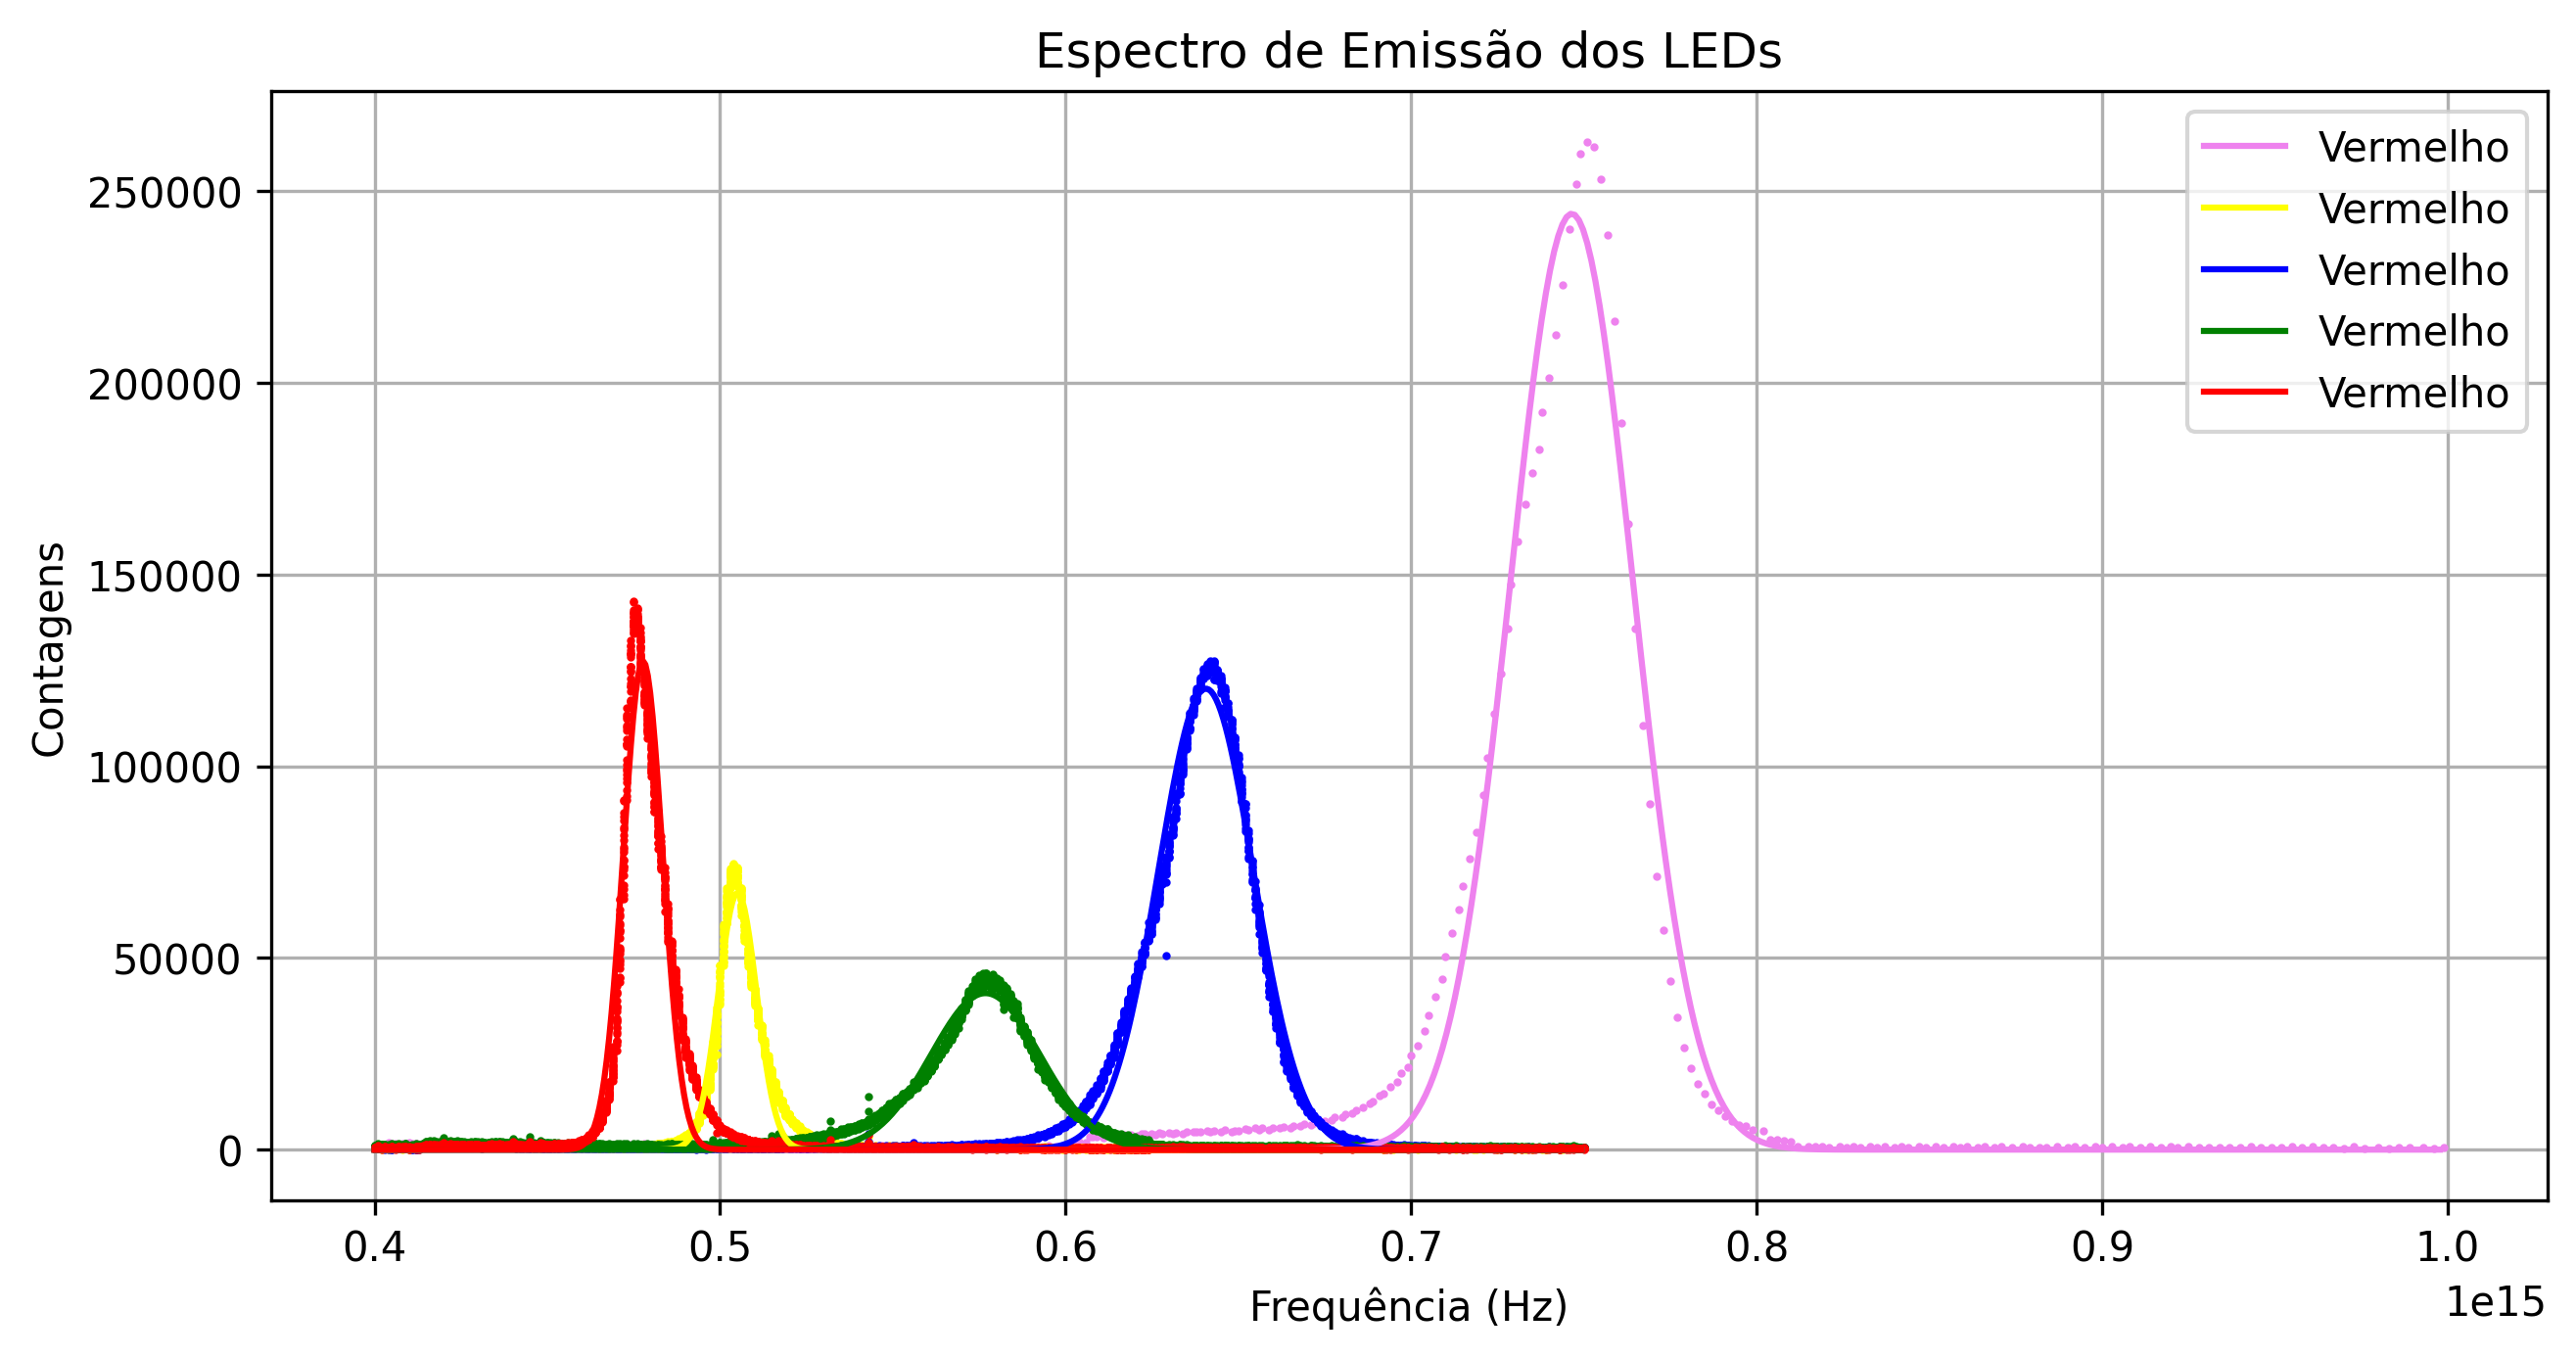

In [ ]:
c = ['violet','yellow','blue','green','red']
plt.rcParams['font.size'] = 10
plt.figure(figsize=(10, 5), dpi=300)
plt.title('Espectro de Emissão dos LEDs')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Contagens')
for i in enumerate(espectro):
  plt.plot(i[1][0], i[1][1],".", c=c[i[0]] ,markersize=2)
for j in enumerate(graphs):
  plt.plot(j[1][0], j[1][1],"-", c=c[j[0]] ,label=i[1][2])
plt.legend()
plt.grid(True,'both')
plt.show()

Beta: [ 3.75291635e-15 -1.14179927e+00]
Beta Std Error: [3.78184933e-16 2.25884705e-01]
Beta Covariance: [[ 4.24991421e-28 -2.50470722e-13]
 [-2.50470722e-13  1.51616116e+02]]
Residual Variance: 0.0003365334848372137
Inverse Condition #: 0.06145949877181007
Reason(s) for Halting:
  Sum of squares convergence


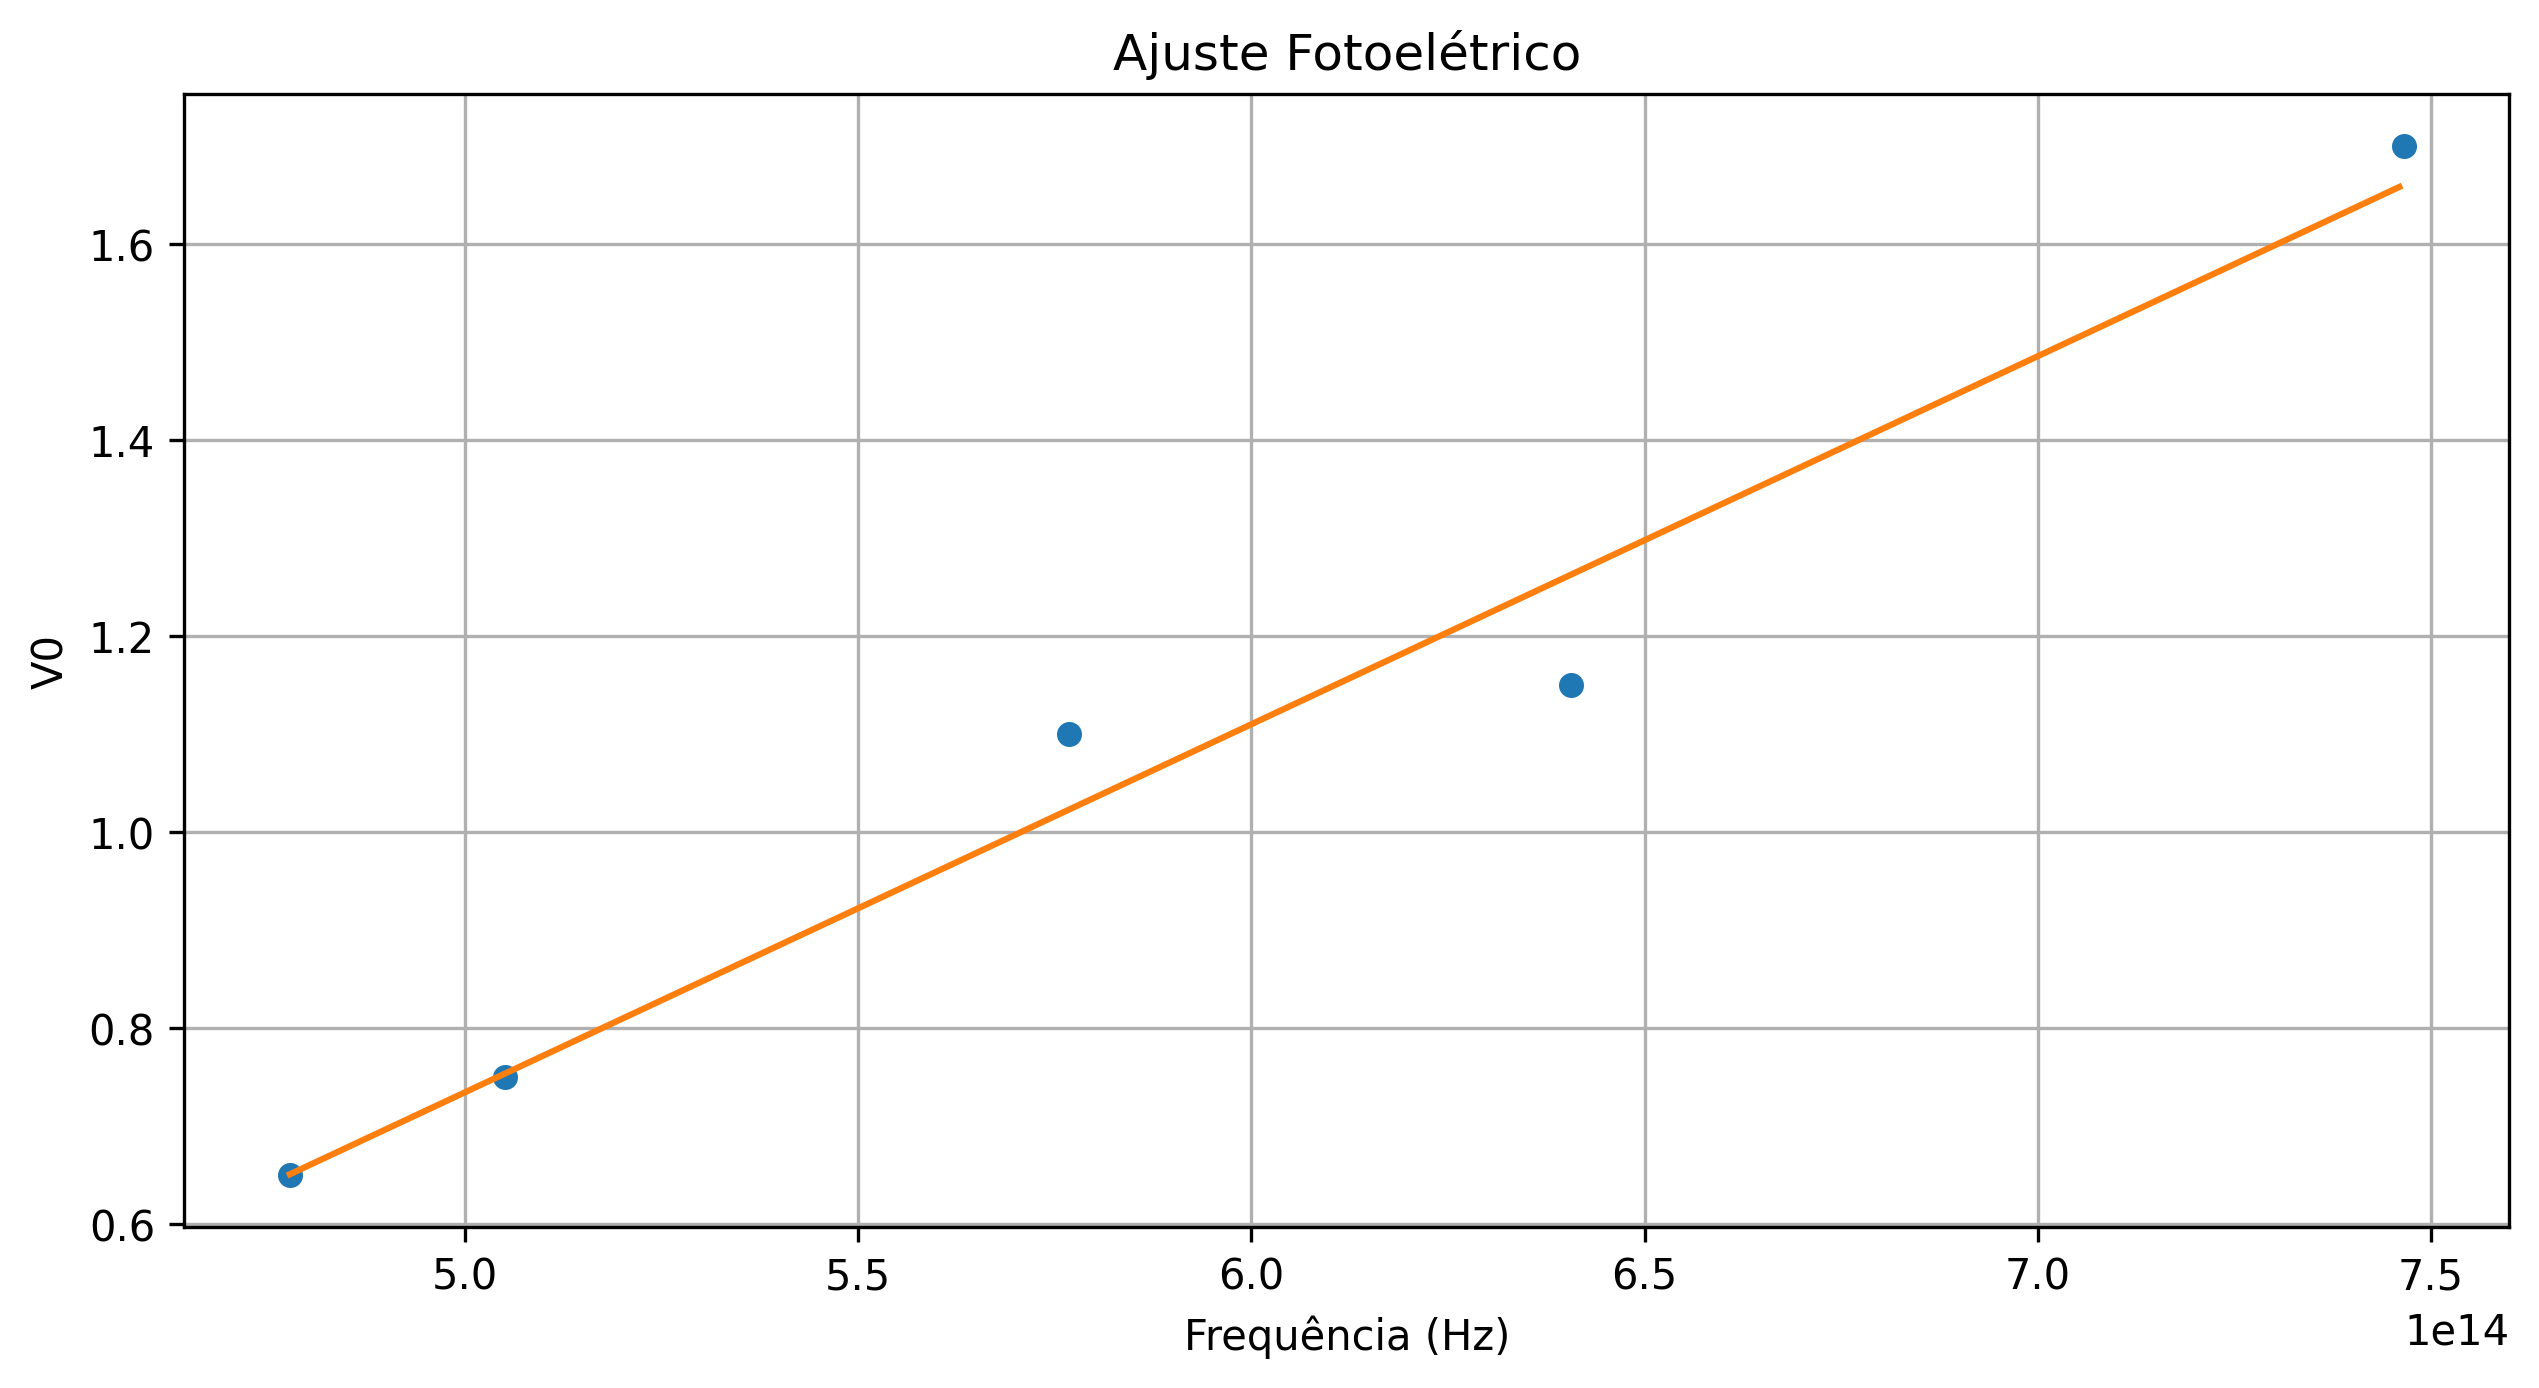

In [ ]:
def func_linear(a,x):
  return a[0]*x + a[1]

graphs = []
popt = []
param = []

V0_new = [[],[],[]]

for k in enumerate(frq[2]):
  for j in enumerate(V0[2]):
    if (k[1] == j[1]):
      V0_new[0].append(V0[0][j[0]]*-1)
      V0_new[1].append(V0[1][j[0]])
      V0_new[2].append(V0[2][j[0]])

steps = 500
f = Model(func_linear)
data = Data(frq[0], V0_new[0],wd=frq[1],we=V0_new[1])
myodr = ODR(data, f, beta0=[4.1e-15,-1.36])
myoutput = myodr.run()
param.append([myoutput.beta,myoutput.sd_beta,myoutput.res_var])
myoutput.pprint()
start_a = frq[0][-1]
stop_a = frq[0][0]
size_a = (stop_a-start_a)/steps
X = np.zeros(steps)
Y = np.zeros(steps)
for u in range(steps):
    X[u] = start_a + (u*size_a)
    Y[u] = func_linear(myoutput.beta,(u*size_a)+start_a)
graph = [np.array(X),np.array(Y)]

plt.rcParams['font.size'] = 10
plt.figure(figsize=(10, 5), dpi=300)
plt.title('Ajuste Fotoelétrico')
plt.xlabel('Frequência (Hz)')
plt.ylabel('V0')
plt.plot(frq[0], V0_new[0],"." ,markersize=10)
plt.plot(X, Y,"-")
plt.grid(True,'both')
plt.show()

h = 3.75(38) e-15 eV.s
phi = -1,14(23) eV

In [1]:
print(pow(0.0003365334848372137, 1/2))

0.01834484900012027
